In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd

In [2]:
import pandas as pd
path = 'DataForThai.csv'
df = pd.read_csv(path)

In [3]:
df

,Date,Confirmed,Deaths,Recovered,daily_new_patient,daily_new_patient_pct
0,2020-01-22,2.0,0.0,0,NaN,NaN
1,2020-01-23,3.0,0.0,0,1.0,0.500000
2,2020-01-24,5.0,0.0,0,2.0,0.666667
3,2020-01-25,7.0,0.0,0,2.0,0.400000
4,2020-01-26,8.0,0.0,2,1.0,0.142857
...,...,...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593,29.0,0.010972
86,2020-04-17,2700.0,47.0,1689,28.0,0.010479
87,2020-04-18,2733.0,47.0,1787,33.0,0.012222
88,2020-04-19,2765.0,47.0,1928,32.0,0.011709


In [4]:
df.drop(columns=['daily_new_patient', 'daily_new_patient_pct'], inplace = True)
df

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,2.0,0.0,0
1,2020-01-23,3.0,0.0,0
2,2020-01-24,5.0,0.0,0
3,2020-01-25,7.0,0.0,0
4,2020-01-26,8.0,0.0,2
...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593
86,2020-04-17,2700.0,47.0,1689
87,2020-04-18,2733.0,47.0,1787
88,2020-04-19,2765.0,47.0,1928


In [5]:
N = 69625582.0
df['Sus'] = N -  df['Confirmed']
df['Inf']  =df['Confirmed'] - df['Deaths'] - df['Recovered']
df['Rec'] = df['Deaths'] + df['Recovered']

In [6]:
df

,Date,Confirmed,Deaths,Recovered,Sus,Inf,Rec
0,2020-01-22,2.0,0.0,0,69625580.0,2.0,0.0
1,2020-01-23,3.0,0.0,0,69625579.0,3.0,0.0
2,2020-01-24,5.0,0.0,0,69625577.0,5.0,0.0
3,2020-01-25,7.0,0.0,0,69625575.0,7.0,0.0
4,2020-01-26,8.0,0.0,2,69625574.0,6.0,2.0
...,...,...,...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593,69622910.0,1033.0,1639.0
86,2020-04-17,2700.0,47.0,1689,69622882.0,964.0,1736.0
87,2020-04-18,2733.0,47.0,1787,69622849.0,899.0,1834.0
88,2020-04-19,2765.0,47.0,1928,69622817.0,790.0,1975.0


In [7]:
tot = df['Sus']+df['Inf']+df['Rec']

In [8]:
tot

0     69625582.0
1     69625582.0
2     69625582.0
3     69625582.0
4     69625582.0
         ...    
85    69625582.0
86    69625582.0
87    69625582.0
88    69625582.0
89    69625582.0
Length: 90, dtype: float64

In [9]:
df['No']=0
for no in range(len(df)):
    df['No'][no] = no+1

D:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Confirmed,Deaths,Recovered,Sus,Inf,Rec,No
0,2020-01-22,2.0,0.0,0,69625580.0,2.0,0.0,1
1,2020-01-23,3.0,0.0,0,69625579.0,3.0,0.0,2
2,2020-01-24,5.0,0.0,0,69625577.0,5.0,0.0,3
3,2020-01-25,7.0,0.0,0,69625575.0,7.0,0.0,4
4,2020-01-26,8.0,0.0,2,69625574.0,6.0,2.0,5
...,...,...,...,...,...,...,...,...
85,2020-04-16,2672.0,46.0,1593,69622910.0,1033.0,1639.0,86
86,2020-04-17,2700.0,47.0,1689,69622882.0,964.0,1736.0,87
87,2020-04-18,2733.0,47.0,1787,69622849.0,899.0,1834.0,88
88,2020-04-19,2765.0,47.0,1928,69622817.0,790.0,1975.0,89


In [11]:
data = df.copy()

In [12]:
type(df['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

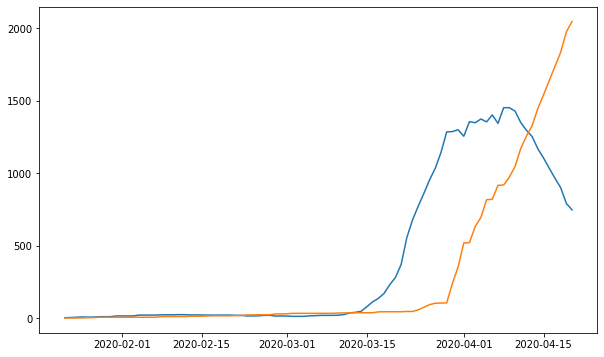

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(df['Date'], df['Sus'])
plt.plot(df['Date'], df['Inf'])
plt.plot(df['Date'], df['Rec'])

In [14]:
t = df['No'].to_numpy()
Sus = df['Sus'].to_numpy()
Inf = df['Inf'].to_numpy()
Rec = df['Rec'].to_numpy()

In [15]:
# Hypothesis

def model(x,t,p):
    
    # optimized parameter
    beta, gamma = p
    
    N = 69625582.0
    
    # SIR states
    S = x[0]
    I = x[1]
    R = x[2]
    
    # hypothesis model
    dSst = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return [dSst, dIdt, dRdt]

In [16]:
def simulate(p):
    T = np.zeros((len(t),3))
    T[0,0] = Sus[0]
    T[0,1] = Inf[0]
    T[0,2] = Rec[0]
    T0 = T[0]
    
    for i in range(len(t)-1):
        ts = [t[i], t[i+1]]
        y = odeint(model, T0, ts, args=(p))
        T0 = y[-1]
        T[i+1] = T0
    return T

In [17]:
def objective(p):
    Tp = simulate(p)
    obj = 0.0
    for i in range(len(t)):
        obj += ((Tp[i,0] - Sus[i])/Sus[i])**2 + ((Tp[i,1] - Inf[i])/Inf[i])**2 + ((Tp[i,2] - Rec[i])/Rec[i])**2
    return obj

In [18]:
# Parameter initiaal guess
beta = 0.0003
gamma = 0.0000001

p0 = [beta, gamma]

In [19]:
bnds =((0.0000000001, 5.0), (0.0000000001, 5.0))
solution = minimize(objective, p0, method='SLSQP', bounds = bnds)
p = solution.x

error: Extra arguments must be in a tuple

In [ ]:
tu = 3,5,6
type(tu)

In [ ]:
# optimized parameter 
beta = p[0]
gamma = p[1]

In [ ]:
# calculate model with updates parameters

Ti = simulate(p0)
Tp = simulate(p)